In [1]:
!pip install efficientnet

     |████████████████████████████████| 50 kB 2.3 MB/s 


In [2]:
import tensorflow as tf
import efficientnet.tfkeras as efn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)

In [3]:
N_CLASSES = 101  # We know this, which is fortunate given TFRecords

In [4]:
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.41.172.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.41.172.162:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [5]:
TEST_URL = 'gs://kds-8772d91453c5088ec014d518651c21c0969a0bedfc4d65d62112adf8/test.tfrecords'
TRAIN_URL = 'gs://kds-8772d91453c5088ec014d518651c21c0969a0bedfc4d65d62112adf8/train.tfrecords'

In [6]:
def get_efficientnet_size(b):
  shape = {
      'B0':224,
      'B1':240,
      'B2':260,
      'B3':300,
      'B4':380,
      'B5':456,
      'B6':528,
      'B7':600,
  }
  return shape[b]

In [7]:
train = tf.data.TFRecordDataset(TRAIN_URL, num_parallel_reads=tf.data.AUTOTUNE)
test = tf.data.TFRecordDataset(TEST_URL, num_parallel_reads=tf.data.AUTOTUNE)

In [10]:
from google.colab import auth
auth.authenticate_user()

In [8]:
for i in train.take(1):
  print(i)

tf.Tensor(b'\n\xb5\xdf\x06\n\xa1\xdf\x06\n\x05image\x12\x96\xdf\x06\n\x92\xdf\x06\n\x8e\xdf\x06\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CD

In [9]:
EFF_SHAPE = get_efficientnet_size('B0')

In [10]:
def parse_tfrecord_fn(example, N_CLASSES=N_CLASSES):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64),

    }
    example = tf.io.parse_single_example(example, feature_description)
    decoded = tf.io.decode_jpeg(example["image"], channels=3)
    # image = tf.image.resize_with_crop_or_pad(decoded, EFF_SHAPE, EFF_SHAPE)   #  This could be useful for other subjects, but for food / this dataset we're ok. Choice of 1 or 2. This is 1.
    image = tf.image.resize(decoded, size=(EFF_SHAPE, EFF_SHAPE), preserve_aspect_ratio=False)     #  We could preserve aspect ratio, but again it just depends **NOTE: EFF_SHAPE is added outside the function** Choice of 1 or 2. This is 2
    # image = tf.keras.preprocessing.image.smart_resize(decoded, (EFF_SHAPE, EFF_SHAPE))             #  Required if preserve_aspect_ratio=True
    example["label"] = tf.one_hot(example["label"], N_CLASSES)

    return image, example['label']

In [11]:
trainRW = train.map(parse_tfrecord_fn, num_parallel_calls=tf.data.AUTOTUNE)
testRW = test.map(parse_tfrecord_fn, num_parallel_calls=tf.data.AUTOTUNE)

# Train an EfficientNetB0 model on Food101. 
* For one model, train 10 epochs with feature extraction
* For the second model, train 5 epochs with feature extraction, 5 with fine-tuning (remember to drop LR rate!)


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 68.92347  ,  31.92347  ,  13.92347  ],
        [ 78.04591  ,  41.97449  ,  20.188774 ],
        [ 78.       ,  43.35204  ,  14.938774 ],
        ...,
        [213.83643  , 168.5558   , 139.96913  ],
        [171.9538   , 127.55073  , 103.356865 ],
        [135.39781  ,  90.39781  ,  69.39781  ]],

       [[ 63.362244 ,  28.362244 ,   8.765305 ],
        [ 60.137756 ,  26.       ,   1.4234676],
        [ 68.59694  ,  33.59694  ,   5.168366 ],
        ...,
        [208.4947   , 164.67836  , 135.05087  ],
        [183.41814  , 139.55081  , 112.82634  ],
        [145.64758  , 103.64758  ,  78.71901  ]],

       [[ 61.72449  ,  29.862246 ,   6.0204086],
        [ 60.76531  ,  27.010204 ,   1.4846939],
        [ 63.821434 ,  29.112247 ,   0.8571434],
        ...,
        [159.02092  , 118.44949  ,  87.80668  ],
        [188.53052  , 148.07135  , 117.37236  ],
        [156.63208  , 117.63208  ,  86.20351  ]],

       ...,

    

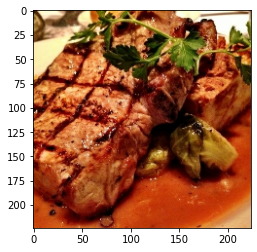

In [15]:
for i in trainRW:
    print(i)#[0])
    plt.imshow(tf.divide(i[0], 255.))
    N_GENRES = i[1].numpy().shape[0]
    break

In [24]:
# If you don't calculate train_steps, harder for TPU to figure out epoch ETA / len
lenTrain = sum(1 for _ in trainRW)
lenTest = sum(1 for _ in testRW)

In [25]:
# # You _could_ also do a temp batch...
# cal = trainRW.batch(BATCH_SIZE)
# tsteps = sum(1 for _ in cal)

In [26]:
BATCH_SIZE = 32 * strategy.num_replicas_in_sync
TRAIN_STEPS = tf.math.ceil(lenTrain / BATCH_SIZE)
TEST_STEPS = tf.math.ceil(lenTest / BATCH_SIZE)

In [27]:
# .cache() and .shard() done automatically on TPU
t = trainRW.repeat().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
te = testRW.repeat().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [28]:
def mod0():
  base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', 
                                                    pooling='max')
  base_model.trainable=False

  inputs = tf.keras.layers.Input(shape=(EFF_SHAPE, EFF_SHAPE, 3))
  x = base_model(inputs)
  outputs = tf.keras.layers.Dense(N_CLASSES, activation='softmax', dtype=tf.float32)(x)

  featExtract = tf.keras.Model(inputs=inputs, outputs=outputs)

  return featExtract

with strategy.scope():
  featExtract = mod0()

In [20]:
# Check trainable params
featExtract.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
featExtract.compile(optimizer=tf.keras.optimizers.Adam(), 
                    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
                    metrics='accuracy')

featExtract.fit(t, steps_per_epoch=TRAIN_STEPS, 
                validation_data=te, validation_steps=int(.25*TEST_STEPS),
                epochs=10
                )

Epoch 1/10
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


296/296 [==============================] - 110s 226ms/step - loss: 3.8663 - accuracy: 0.3348 - val_loss: 2.7895 - val_accuracy: 0.5096
Epoch 2/10
296/296 [==============================] - 34s 115ms/step - loss: 2.7842 - accuracy: 0.5037 - val_loss: 2.4742 - val_accuracy: 0.5754
Epoch 3/10
296/296 [==============================] - 31s 106ms/step - loss: 2.4830 - accuracy: 0.5648 - val_loss: 2.3502 - val_accuracy: 0.5981
Epoch 4/10
296/296 [==============================] - 32s 108ms/step - loss: 2.3255 - accuracy: 0.6002 - val_loss: 2.3091 - val_accuracy: 0.6014
Epoch 5/10
296/296 [==============================] - 28s 95ms/step - loss: 2.2259 - accuracy: 0.6234 - val_loss: 2.2893 - val_accuracy: 0.6087
Epoch 6/10
296/296 [==============================] - 28s 96ms/step - loss: 2.1536 - accuracy: 0.6405 - val_loss: 2.2602 - val_accuracy: 0.6156
Epoch 7/10
296/296 [==============================] - 28s 95ms/step - loss: 2.0904 - accuracy: 0.6586 - val_loss: 2.2721 - val_accuracy: 0.614

## Model 1 with mixed precision

In [24]:
# With mixed precision, you can batch_size*=2. Have not done that here, since batch size changes might mean unintended changes to learning rate
tf.keras.mixed_precision.set_global_policy('mixed_bfloat16')

In [25]:
tf.keras.backend.clear_session()  #  To make sure no weights are carried over from previous model

In [26]:
def mod1():
  base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', 
                                                    pooling='max')
  base_model.trainable=False

  inputs = tf.keras.layers.Input(shape=(EFF_SHAPE, EFF_SHAPE, 3))
  x = base_model(inputs)
  outputs = tf.keras.layers.Dense(N_CLASSES, activation='softmax', dtype=tf.float32)(x)

  mp = tf.keras.Model(inputs=inputs, outputs=outputs)
  return mp

In [27]:
with strategy.scope():
  mp = mod1()

mp.compile(optimizer=tf.keras.optimizers.Adam(),
           loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
           metrics='accuracy')

mp.fit(t, steps_per_epoch=TRAIN_STEPS, 
     validation_data=te, validation_steps=TEST_STEPS,
     epochs=10)

Epoch 1/10
296/296 [==============================] - 84s 202ms/step - loss: 3.8831 - accuracy: 0.3345 - val_loss: 2.7499 - val_accuracy: 0.5095
Epoch 2/10
296/296 [==============================] - 41s 137ms/step - loss: 2.7654 - accuracy: 0.5104 - val_loss: 2.4994 - val_accuracy: 0.5652
Epoch 3/10
296/296 [==============================] - 37s 125ms/step - loss: 2.4804 - accuracy: 0.5657 - val_loss: 2.3738 - val_accuracy: 0.5901
Epoch 4/10
296/296 [==============================] - 35s 120ms/step - loss: 2.3144 - accuracy: 0.6037 - val_loss: 2.2989 - val_accuracy: 0.6078
Epoch 5/10
296/296 [==============================] - 36s 121ms/step - loss: 2.2108 - accuracy: 0.6261 - val_loss: 2.3412 - val_accuracy: 0.6001
Epoch 6/10
296/296 [==============================] - 32s 110ms/step - loss: 2.1436 - accuracy: 0.6442 - val_loss: 2.2867 - val_accuracy: 0.6108
Epoch 7/10
296/296 [==============================] - 33s 110ms/step - loss: 2.0868 - accuracy: 0.6570 - val_loss: 2.2687 - val_ac

## Second model: 5 epochs fitting, 5 epochs fine tuning


In [29]:
LR = .001

In [30]:
tf.keras.backend.clear_session()

In [31]:
def mod2():
  base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', 
                                                    pooling='max')
  base_model.trainable=False

  inputs = tf.keras.layers.Input(shape=(EFF_SHAPE, EFF_SHAPE, 3))
  x = base_model(inputs)
  outputs = tf.keras.layers.Dense(N_CLASSES, activation='softmax', dtype=tf.float32)(x)
  
  fine_tuning = tf.keras.Model(inputs=inputs, outputs=outputs)
  return fine_tuning

In [52]:
# Okay, with callback then!

import tensorflow.keras.backend as K
class UnFreezeCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, model, n_epochs=5, layers_to_unfreeze=20):
        super().__init__()
        self.n_epochs = n_epochs
        self.model = model

    def on_epoch_end(self, epoch, logs=None):
        if epoch == self.n_epochs:

          # lower the lr if we want
          # K.set_value(self.model.optimizer.lr, LR*.1)

          for idx in range(len(self.model.layers)):

              # unfreeze the base model after n_epcoh 
              if self.model.get_layer(index = idx).name == 'efficientnetb0':

                  base_model = self.model.get_layer(index = idx)

                  nlayers = len(base_model.layers)
                  for i, layer in enumerate(base_model.layers):
                    if i in range(nlayers - self.layers_to_unfreeze, nlayers+1):
                        if not isinstance(layer, tf.keras.layers.BatchNormalization):
                            layer.trainable = True
                    else:
                      layer.trainable = False
                

                  # we have to compile
                  # as we change param of .trainable 
                  self.model.compile(
                      optimizer=tf.keras.optimizers.Adam(LR*.1),
                      loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
                      metrics='accuracy'
                  )
                  print('[INFO]: Base Model Unfreeze.')
                  print(self.model.summary())

In [44]:
with strategy.scope():
  fine_tuning = mod2()

In [50]:
unfreeze = UnFreezeCallback(model=fine_tuning, n_epochs=2)

In [51]:
fine_tuning.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
                    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
                    metrics='accuracy')

fine_tuning.fit(t, steps_per_epoch=TRAIN_STEPS,
                validation_data=te, validation_steps=int(.25*TEST_STEPS),
                epochs=10, callbacks=[unfreeze])

Epoch 1/10
  6/296 [..............................] - ETA: 27s - loss: 2.3988 - accuracy: 0.5781WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0044s vs `on_train_batch_end` time: 6.2063s). Check your callbacks.


296/296 [==============================] - 111s 221ms/step - loss: 2.1244 - accuracy: 0.6497 - val_loss: 2.2583 - val_accuracy: 0.6206
Epoch 2/10
296/296 [==============================] - 28s 95ms/step - loss: 2.0634 - accuracy: 0.6659 - val_loss: 2.2657 - val_accuracy: 0.6117
Epoch 3/10
296/296 [==============================] - ETA: 0s - loss: 2.0332 - accuracy: 0.6739[INFO]: Base Model Unfreeze.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense_2 (Dense)             (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
No

TypeError: ignored

In [53]:
fine_tuning.fit(t, steps_per_epoch=TRAIN_STEPS,
                validation_data=te, validation_steps=int(.25*TEST_STEPS),
                epochs=5, )#callbacks=[unfreeze])

Epoch 1/5
296/296 [==============================] - 110s 219ms/step - loss: 1.7974 - accuracy: 0.7413 - val_loss: 2.0684 - val_accuracy: 0.6512
Epoch 2/5
296/296 [==============================] - 28s 96ms/step - loss: 1.7761 - accuracy: 0.7478 - val_loss: 2.0586 - val_accuracy: 0.6533
Epoch 3/5
296/296 [==============================] - 30s 100ms/step - loss: 1.7649 - accuracy: 0.7511 - val_loss: 2.0593 - val_accuracy: 0.6509
Epoch 4/5
296/296 [==============================] - 28s 96ms/step - loss: 1.7615 - accuracy: 0.7522 - val_loss: 2.0537 - val_accuracy: 0.6543
Epoch 5/5
296/296 [==============================] - 28s 96ms/step - loss: 1.7527 - accuracy: 0.7546 - val_loss: 2.0532 - val_accuracy: 0.6520


In [32]:
# writing fine-tuning callbacks ideas
# https://stackoverflow.com/questions/58297573/making-layers-untrainable-at-end-of-epoch-changes-loss-in-next-epoch

In [33]:
fine_tuning.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [45]:
weights = fine_tuning.get_weights()

In [80]:
def mod2p2():
  base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', 
                                                    pooling='max')
  nlayers = len(base_model.layers)
  for i, layer in enumerate(base_model.layers):
    if i in range(nlayers - 20, nlayers+1):
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
    else:
      layer.trainable = False

  inputs = tf.keras.layers.Input(shape=(EFF_SHAPE, EFF_SHAPE, 3))
  x = base_model(inputs)
  outputs = tf.keras.layers.Dense(N_CLASSES, activation='softmax', dtype=tf.float32)(x)
  
  fine_tuning = tf.keras.Model(inputs=inputs, outputs=outputs)
  return fine_tuning

In [81]:
with strategy.scope():
  fine_tuning2 = mod2p2()


In [82]:
fine_tuning2.set_weights(weights)

In [83]:
fine_tuning2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense_7 (Dense)             (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 1,259,157
Non-trainable params: 2,919,795
_________________________________________________________________


In [84]:
fine_tuning2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR*.1),
                    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
                    metrics='accuracy')

fine_tuning2.fit(t, steps_per_epoch=TRAIN_STEPS,
                validation_data=te, validation_steps=int(.25*TEST_STEPS),
                epochs=10, initial_epoch=5)

Epoch 6/10
296/296 [==============================] - 83s 187ms/step - loss: nan - accuracy: 0.0109 - val_loss: nan - val_accuracy: 0.0083
Epoch 7/10
 61/296 [=====>........................] - ETA: 24s - loss: nan - accuracy: 0.0092

KeyboardInterrupt: ignored

# Retrain the model (feature extraction and fine-tuning) we trained in this notebook, except this time use EfficientNetB4 as the base model instead of EfficientNetB0. Do you notice an improvement in performance? Does it take longer to train? Are there any tradeoffs to consider?

In [94]:
EFF_SHAPE = get_efficientnet_size('B4')

# Need to reshape again, let's remap 
trainRW = train.map(parse_tfrecord_fn, num_parallel_calls=tf.data.AUTOTUNE)
testRW = test.map(parse_tfrecord_fn, num_parallel_calls=tf.data.AUTOTUNE)

# .cache() and .shard() done automatically on TPU
t = trainRW.repeat().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
te = testRW.repeat().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [95]:
for i in t.take(1):
  print(i)

(<tf.Tensor: shape=(256, 380, 380, 3), dtype=float32, numpy=
array([[[[ 33.       ,   9.       ,   9.       ],
         [ 33.       ,   9.       ,   9.       ],
         [ 32.99543  ,   8.995429 ,   8.995429 ],
         ...,
         [119.73751  , 141.7375   , 129.7375   ],
         [118.48424  , 139.52629  , 128.00526  ],
         [118.18329  , 138.18329  , 127.18329  ]],

        [[ 33.       ,   9.       ,   9.       ],
         [ 32.99177  ,   8.991773 ,   8.991773 ],
         [ 32.1295   ,   8.129501 ,   8.129501 ],
         ...,
         [119.8842   , 141.8842   , 129.8842   ],
         [119.49477  , 140.53682  , 129.0158   ],
         [120.02884  , 140.02884  , 129.02884  ]],

        [[ 33.       ,   9.       ,   9.       ],
         [ 32.478947 ,   8.478947 ,   8.478947 ],
         [ 31.977146 ,   7.977147 ,   7.977147 ],
         ...,
         [120.86841  , 142.86841  , 130.86841  ],
         [120.47897  , 141.52103  , 130.       ],
         [121.826324 , 141.82632  , 130.826

In [99]:
def mod3():
  base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights='imagenet',
                                                  pooling='max')
  base_model.trainable=False

  inputs = tf.keras.layers.Input(shape=(EFF_SHAPE, EFF_SHAPE, 3))
  x = base_model(inputs)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  outputs = tf.keras.layers.Dense(N_CLASSES, activation='softmax', dtype=tf.float32)(x)

  b4 = tf.keras.Model(inputs=inputs, outputs=outputs)
  return b4

In [100]:
with strategy.scope():
  b4 = mod3()

b4.compile(optimizer=tf.keras.optimizers.Adam(LR),
           loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
           metrics='accuracy')

b4.fit(t, steps_per_epoch=TRAIN_STEPS,
       validation_data=te, validation_steps=int(.25*TEST_STEPS),
       epochs=5)


Epoch 1/5
296/296 [==============================] - 121s 286ms/step - loss: 3.5947 - accuracy: 0.2432 - val_loss: 2.7082 - val_accuracy: 0.4404
Epoch 2/5
296/296 [==============================] - 68s 228ms/step - loss: 2.7185 - accuracy: 0.4510 - val_loss: 2.4313 - val_accuracy: 0.5295
Epoch 3/5
296/296 [==============================] - 66s 225ms/step - loss: 2.5372 - accuracy: 0.5036 - val_loss: 2.3207 - val_accuracy: 0.5602
Epoch 4/5
296/296 [==============================] - 67s 225ms/step - loss: 2.4510 - accuracy: 0.5298 - val_loss: 2.2753 - val_accuracy: 0.5788
Epoch 5/5
296/296 [==============================] - 67s 226ms/step - loss: 2.3911 - accuracy: 0.5470 - val_loss: 2.2469 - val_accuracy: 0.5838


In [101]:
weights2 = b4.get_weights()

In [121]:
def mod3p2():
  base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights='imagenet',
                                                  pooling='max')
  nlayers = len(base_model.layers)
  for i, layer in enumerate(base_model.layers):
    if i in range(nlayers - 20, nlayers+1):
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True
    else:
      layer.trainable = False

  inputs = tf.keras.layers.Input(shape=(EFF_SHAPE, EFF_SHAPE, 3))
  x = base_model(inputs)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  outputs = tf.keras.layers.Dense(N_CLASSES, activation='softmax', dtype=tf.float32)(x)

  b4 = tf.keras.Model(inputs=inputs, outputs=outputs)
  b4.set_weights(weights2)
  return b4

In [122]:
with strategy.scope():
  b4two = mod3p2()

In [104]:
b4.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense_12 (Dense)            (None, 256)               459008    
                                                                 
 dense_13 (Dense)            (None, 101)               25957     
                                                                 
Total params: 18,158,788
Trainable params: 484,965
Non-trainable params: 17,673,823
_________________________________________________________________


In [105]:
b4two.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense_14 (Dense)            (None, 256)               459008    
                                                                 
 dense_15 (Dense)            (None, 101)               25957     
                                                                 
Total params: 18,158,788
Trainable params: 4,341,461
Non-trainable params: 13,817,327
_________________________________________________________________


In [124]:
b4two.set_weights(weights2)

In [125]:
b4two.compile(optimizer=tf.keras.optimizers.Adam(LR*.1),
           loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
           metrics='accuracy')

b4two.fit(t, steps_per_epoch=TRAIN_STEPS, 
       validation_data=te, validation_steps=int(.25*TEST_STEPS),
       epochs=10, initial_epoch=5)

Epoch 1/5
296/296 [==============================] - 133s 312ms/step - loss: nan - accuracy: 0.0114 - val_loss: nan - val_accuracy: 0.0083
Epoch 2/5
296/296 [==============================] - 68s 231ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0083
Epoch 3/5
296/296 [==============================] - 69s 233ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0083
Epoch 4/5
296/296 [==============================] - 70s 238ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0083
Epoch 5/5
296/296 [==============================] - 70s 238ms/step - loss: nan - accuracy: 0.0099 - val_loss: nan - val_accuracy: 0.0083


In [129]:
# Okay, with callback then!

import tensorflow.keras.backend as K
class UnFreezeCallback(tf.keras.callbacks.Callback):
    def __init__(self, n_epochs=5):
        super().__init__()
        self.n_epochs = n_epochs

    def on_epoch_end(self, epoch, logs=None):
        if epoch == self.n_epochs:

          # lower the lr if we want
          # K.set_value(self.model.optimizer.lr, LR*.1)

          for idx in range(len(model.layers)):

              # unfreeze the base model after n_epcoh 
              if self.model.get_layer(index = idx).name == 'efficientnetb4':

                  base_model = self.model.get_layer(index = idx)

                  nlayers = len(base_model.layers)
                  for i, layer in enumerate(base_model.layers):
                    if i in range(nlayers - 20, nlayers+1):
                        if not isinstance(layer, tf.keras.layers.BatchNormalization):
                            layer.trainable = True
                    else:
                      layer.trainable = False
                

                  # we have to compile
                  # as we change param of .trainable 
                  self.model.compile(
                      optimizer=tf.keras.optimizers.Adam(LR*.1),
                      loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1),
                      metrics='accuracy'
                  )
                  print('[INFO]: Base Model Unfreeze.')
                  print(self.model.summary())

# Name one important benefit of mixed precision training, how does this benefit take place?

In [130]:
# One benefit is (should be) a speed improvement as the underlying mechanism for holding float values in RAM / on disk now 
# takes up less space. This modifies loading to GPU and kernel calculation times.

# Use the same evaluation techniques on the large-scale Food Vision model as you did in the previous notebook (Transfer Learning Part 3: Scaling up). More specifically, it would be good to see:
* A confusion matrix between all of the model's predictions and true labels.
* A graph showing the f1-scores of each class.
* A visualization of the model making predictions on various images and comparing the predictions to the ground truth.

For example, plot a sample image from the test dataset and have the title of the plot show the prediction, the prediction probability and the ground truth label.


In [54]:
preds = fine_tuning.predict(te, steps=TEST_STEPS)

In [55]:
y_preds = tf.argmax(preds, axis=1).numpy()

In [168]:
# import tensorflow_datasets as tfds

In [56]:
# (test, test_labels) = tfds.load('food101', split='test', as_supervised=True)

In [58]:
# test_labels=[]
# for images, labels in te.unbatch():
#     test_labels.append(labels) # or labels.numpy().argmax() for int labels

In [152]:
true = te.map(lambda x, y: y, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
1+1

In [156]:
y_true = list(true)

KeyboardInterrupt: ignored

In [148]:
y_true[0].

<tf.Tensor: shape=(256, 101), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [170]:
TEST_STEPS

<tf.Tensor: shape=(), dtype=float32, numpy=99.0>

In [179]:
TEST_STEPS.numpy()

99.0

In [189]:
lenTest

25250

In [193]:
ex = 0
for i in loop[:99]:
  ex+=len(i)
ex

25344

In [197]:
for i in testRW:
  print(i[1])
  break

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.], shape=(101,), dtype=float32)


In [64]:
34 < TEST_STEPS.numpy()

True

In [75]:
from IPython.display import clear_output

labels = []
for n, i in enumerate(te):
  if n <= TEST_STEPS.numpy():
    clear_output(wait=True)
    print(n)
    labels.append(tf.argmax(i[1].numpy(), axis=1))
  else:
    break
# for n, i in enumerate(testRW):
#   print(n)
#   while n <= TEST_STEPS:
#     labels.append(i[1].numpy())

99


In [80]:
trues = np.concatenate(labels)
len(trues)

25600

In [82]:
lenTest

25250

In [81]:
trues[0]

28

In [83]:
trues[25250]

28

In [84]:
trues[1], trues[25251]

(12, 12)

In [85]:
y_true = trues[:lenTest]

In [87]:
y_preds

array([38, 12, 78, ..., 12, 40, 93])

In [86]:
y_true 

array([28, 12, 78, ..., 17, 73, 88])

In [98]:
import tensorflow_datasets as tfds
train, info = tfds.load('food101', split=['train[:1]'], as_supervised=True, with_info=True)

In [114]:
info

tfds.core.DatasetInfo(
    name='food101',
    version=2.0.0,
    description='This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.',
    homepage='https://www.vision.ee.ethz.ch/datasets_extra/food-101/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    total_num_examples=101000,
    splits={
        'train': 75750,
        'validation': 25250,
    },
    supervised_keys=('image', 'label'),
    citation="""@inproceedings{bossard14,
      title = {Food-101 -- Mining Discriminative Components with Random Forests},
      

In [109]:
classes = info.features['label'].names

In [113]:
len(y_true)

25250

In [127]:
lookup = {i:cls for i, cls in enumerate(classes)}
lookup

{0: 'apple_pie',
 1: 'baby_back_ribs',
 2: 'baklava',
 3: 'beef_carpaccio',
 4: 'beef_tartare',
 5: 'beet_salad',
 6: 'beignets',
 7: 'bibimbap',
 8: 'bread_pudding',
 9: 'breakfast_burrito',
 10: 'bruschetta',
 11: 'caesar_salad',
 12: 'cannoli',
 13: 'caprese_salad',
 14: 'carrot_cake',
 15: 'ceviche',
 16: 'cheesecake',
 17: 'cheese_plate',
 18: 'chicken_curry',
 19: 'chicken_quesadilla',
 20: 'chicken_wings',
 21: 'chocolate_cake',
 22: 'chocolate_mousse',
 23: 'churros',
 24: 'clam_chowder',
 25: 'club_sandwich',
 26: 'crab_cakes',
 27: 'creme_brulee',
 28: 'croque_madame',
 29: 'cup_cakes',
 30: 'deviled_eggs',
 31: 'donuts',
 32: 'dumplings',
 33: 'edamame',
 34: 'eggs_benedict',
 35: 'escargots',
 36: 'falafel',
 37: 'filet_mignon',
 38: 'fish_and_chips',
 39: 'foie_gras',
 40: 'french_fries',
 41: 'french_onion_soup',
 42: 'french_toast',
 43: 'fried_calamari',
 44: 'fried_rice',
 45: 'frozen_yogurt',
 46: 'garlic_bread',
 47: 'gnocchi',
 48: 'greek_salad',
 49: 'grilled_chees

In [131]:
1+1

2

In [130]:
y_preds.apply(lookup)

AttributeError: ignored

In [133]:
y_true_str = np.vectorize(lookup.get)(y_true)

In [134]:
y_true_str[:5]

array(['croque_madame', 'cannoli', 'poutine', 'waffles', 'beef_tartare'],
      dtype='<U23')

In [135]:
y_preds_str = np.vectorize(lookup.get)(y_preds)

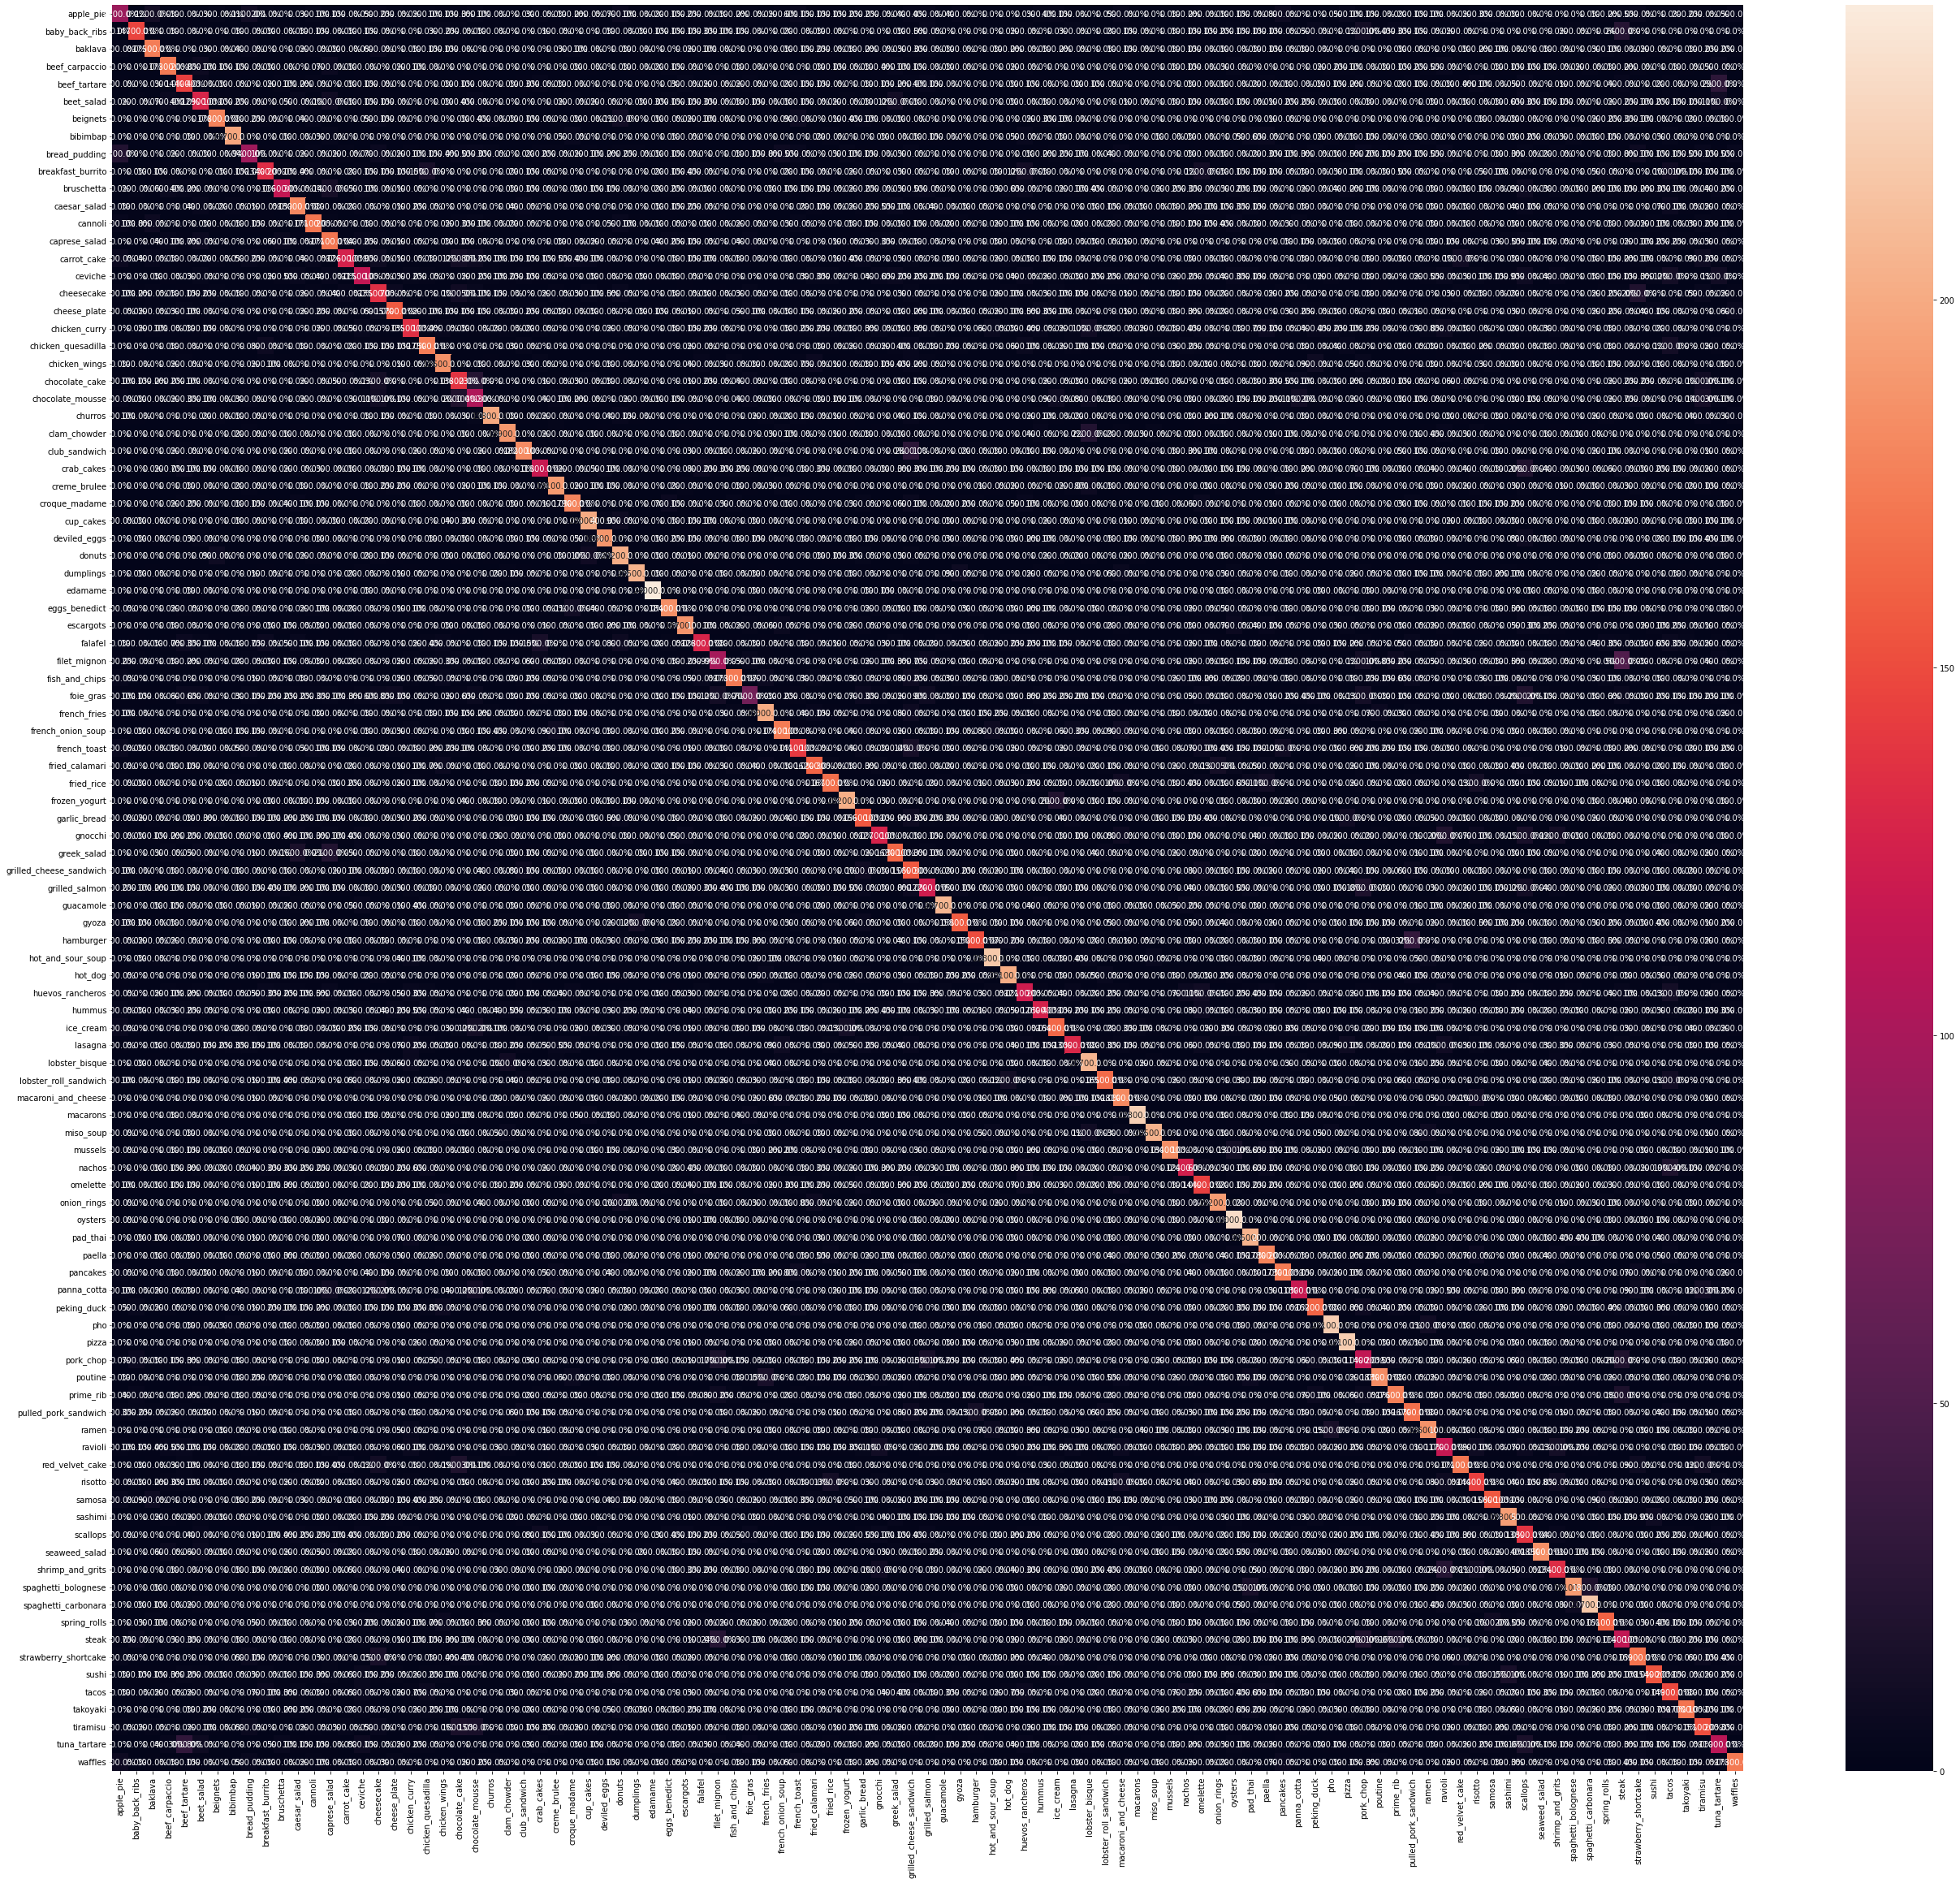

In [145]:
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(y_true_str, y_preds_str[:len(y_true)], labels=classes)
plt.figure(figsize=(45, 40))
ax = sns.heatmap(conf, annot=True, fmt=".1%")
# plt.xticks(classes)
# plt.yticks(classes[::-1])
ax.axes.set_xticklabels(classes)
ax.axes.set_yticklabels(classes)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('confmtx2.pdf', bbox_inches='tight', format='pdf')
plt.savefig('confmtx2.svg', bbox_inches='tight', format='svg')
plt.show()

In [198]:
report = classification_report(y_true, y_preds[:len(y_true)], target_names=classes, output_dict=True)
# report

TypeError: ignored

In [170]:
only_food = dict(list(report.items())[:-1])

In [172]:
f1 = {}
for k, v in report.items():
  # print(k, report[k]['f1-score'])
  f1.update({k:report[k]['f1-score']})

TypeError: ignored

In [173]:
len(f1)

101

In [185]:
import pandas as pd
df = pd.DataFrame([[k,v] for k,v in f1.items()])

In [188]:
df.columns = ['label', 'f1']

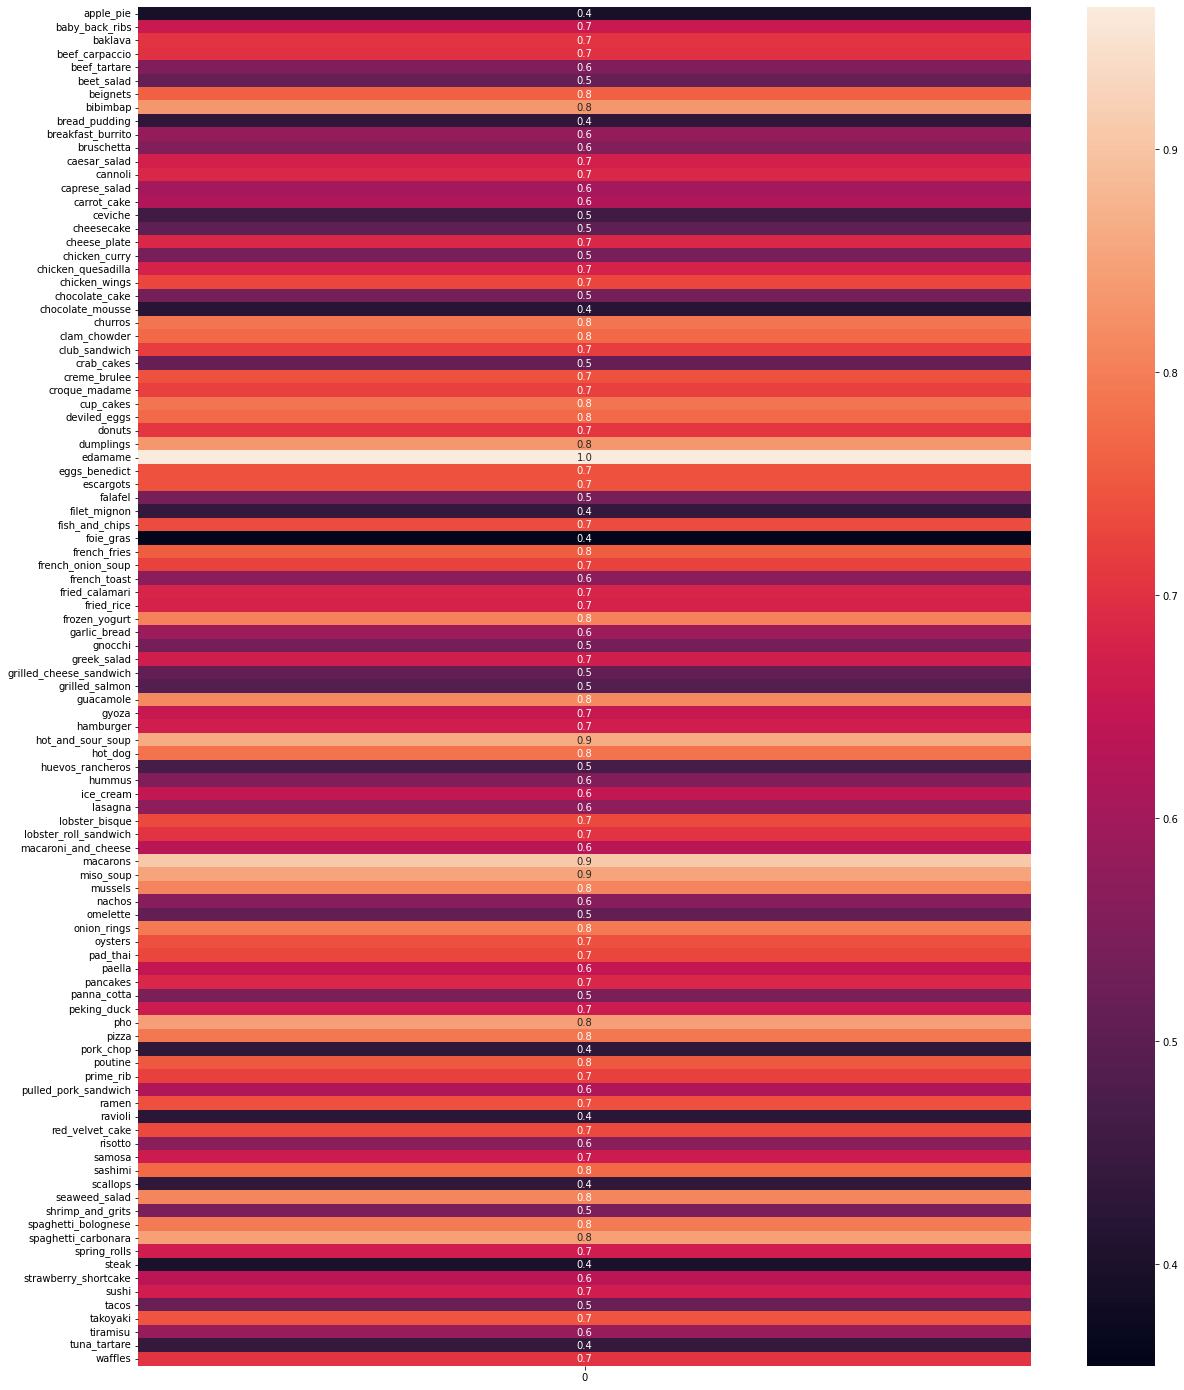

In [200]:
plt.figure(figsize=(20,25))
ax=sns.heatmap(df.f1.values.reshape(len(df), 1), annot=True, fmt=".1f")
ax.axes.set_yticklabels(classes)
plt.show()

In [201]:
def display_one(image, clas, pred, subplot):
  plt.subplot(subplot)
  plt.axis('off')
  plt.imshow(image)
  color = 'green' if clas==pred else 'red'
  plt.title(f'{clas} \n {pred}', color=color, ha='center', weight='bold')

In [202]:
def batch_nine(dataset):
  for i in dataset.take(1):
    images = i[0][:9]
    labels = tf.argmax(i[1][:9], axis=1)
    return images, labels
    

In [203]:
def viz_predict(dataset, model=None, classes=None):

  dataset=dataset.shuffle(BATCH_SIZE*3)

  if classes is None:
    try:
      classes = dataset.class_names
    except:
      print('Try a list of classes')
  
  imgs, labs = batch_nine(dataset)
  imgs = imgs / 255.
  clas = [classes[idx] for idx in labs]
  
  if model is not None:
    preds = model.predict(imgs)
    predIdx = tf.argmax(tf.nn.softmax(preds), axis=1)
    pred = [classes[idx] for idx in predIdx]
  else:
    pred=clas

  plt.figure(figsize=(13,13))
  for i in range(9):
    display_one(imgs[i], clas[i], pred[i], 331+i)
  plt.tight_layout()
  plt.subplots_adjust(wspace=.1, hspace=.15)
  plt.show()

  return preds



In [ ]:
# These models seem to wayyyy overfit, or else I am just screwing it up

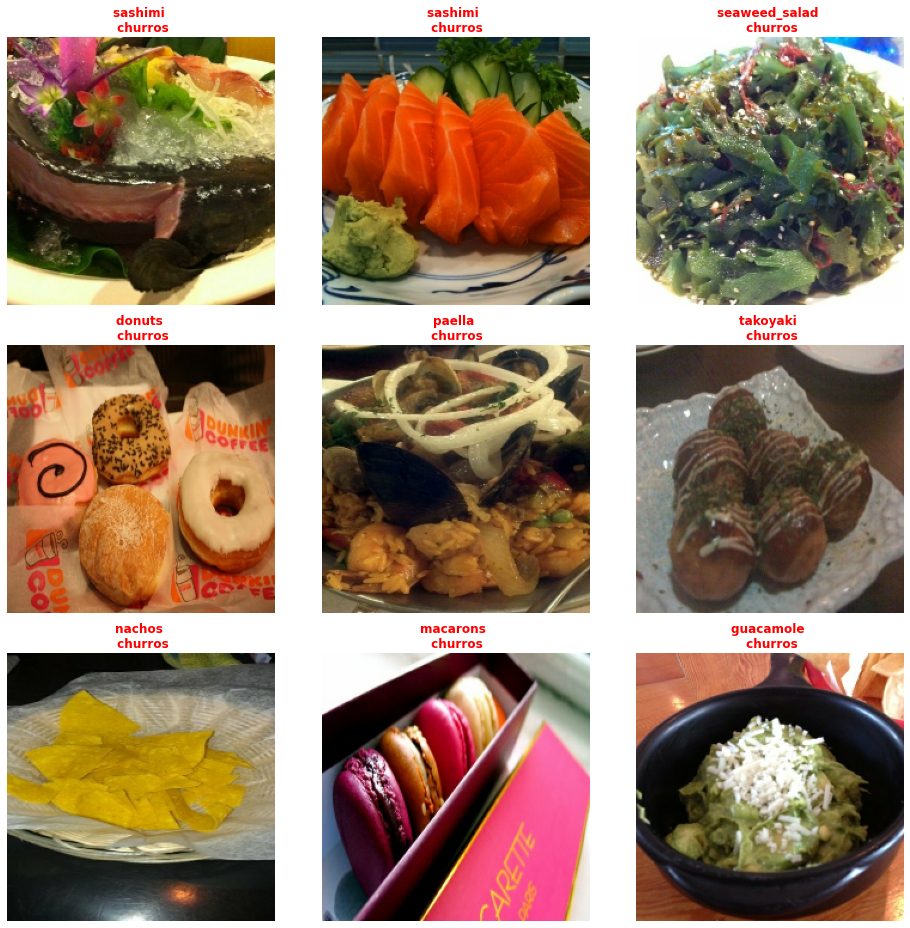

array([[3.90759436e-04, 5.70768910e-03, 8.82955792e-04, 9.83034533e-06,
        4.02987280e-05, 3.59661441e-04, 3.94610324e-05, 1.60109739e-05,
        4.06972045e-04, 9.42458585e-03, 8.03601233e-06, 9.49087553e-06,
        7.69279723e-07, 1.72931141e-05, 6.86860512e-05, 1.79915514e-05,
        8.48713238e-03, 1.17048708e-04, 6.29790957e-05, 4.26385704e-05,
        6.38804864e-04, 1.70865595e-01, 3.83943086e-03, 2.28529751e-01,
        7.52495369e-03, 1.10727130e-02, 8.75531754e-04, 8.20636097e-03,
        2.45098067e-06, 1.03955725e-02, 3.62467399e-05, 1.16136679e-02,
        1.15841076e-05, 5.89300925e-03, 2.81929101e-06, 5.20256435e-05,
        2.93895733e-02, 5.20172762e-04, 2.77913186e-05, 4.73535107e-03,
        2.47937962e-02, 2.52454356e-05, 3.99530581e-05, 1.37484471e-06,
        7.60591356e-03, 1.30786945e-03, 9.43712075e-06, 2.17794394e-03,
        5.48840490e-06, 7.66170956e-03, 5.55622537e-05, 7.34455971e-05,
        8.72149212e-06, 4.03341139e-04, 5.09737409e-04, 7.333858

In [204]:
viz_predict(te, model=fine_tuning, classes=classes)